In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### EDA

In [39]:
df = pd.read_csv('data/Video_Games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Data cleaning

In [40]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [41]:
df = df.dropna(subset=['Publisher','Name','Year_of_Release'])
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [42]:
# replace NaN values
df['Developer'].fillna(df['Publisher'], inplace=True)
df['Critic_Count'].fillna(df['Critic_Count'].mean(),inplace=True)
df['Critic_Score'].fillna(df['Critic_Score'].mean(),inplace=True)
df['User_Count'].fillna(df['User_Count'].mean(),inplace=True)
# df['User_Score'].fillna(df['User_Score'].mean(),inplace=True)
# df['Rating'].fillna(df['Rating'].mean(),inplace=True)
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6579
User_Count            0
Developer             0
Rating             6649
dtype: int64

In [43]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['User_Score'].fillna(df['User_Score'].mean(),inplace=True)
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             0
Rating             6649
dtype: int64

In [53]:
# I replaced the NaN value of Rating with its mode
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

## Genre Analysis

### Analysis of game genre distribution

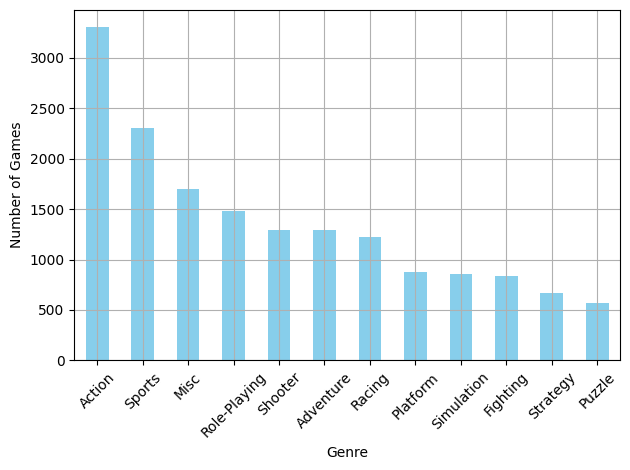

In [59]:
df['Genre'].value_counts().plot(kind='bar',color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Total Global sales for each genre

<AxesSubplot: ylabel='Global_Sales'>

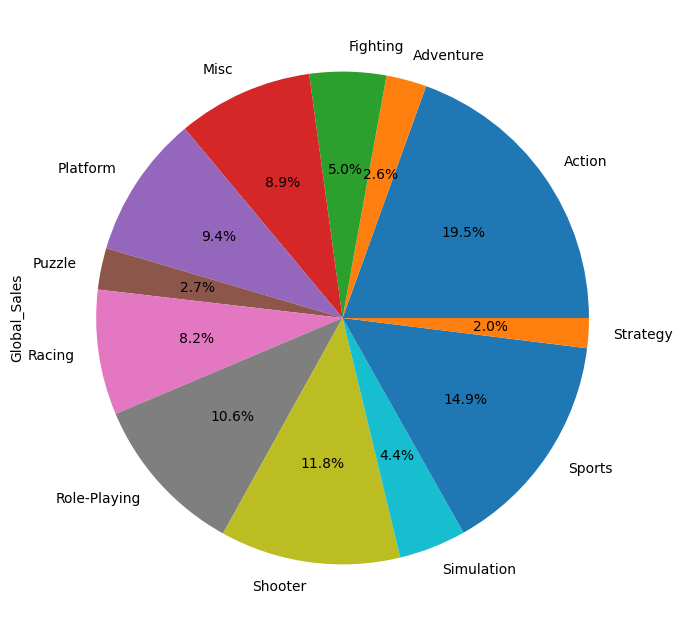

In [65]:
plt.figure(figsize=(10,8))
df.groupby('Genre')['Global_Sales'].sum().plot(kind='pie',autopct='%1.1f%%',)


## Platform analysis

### Analysis of games on different platforms

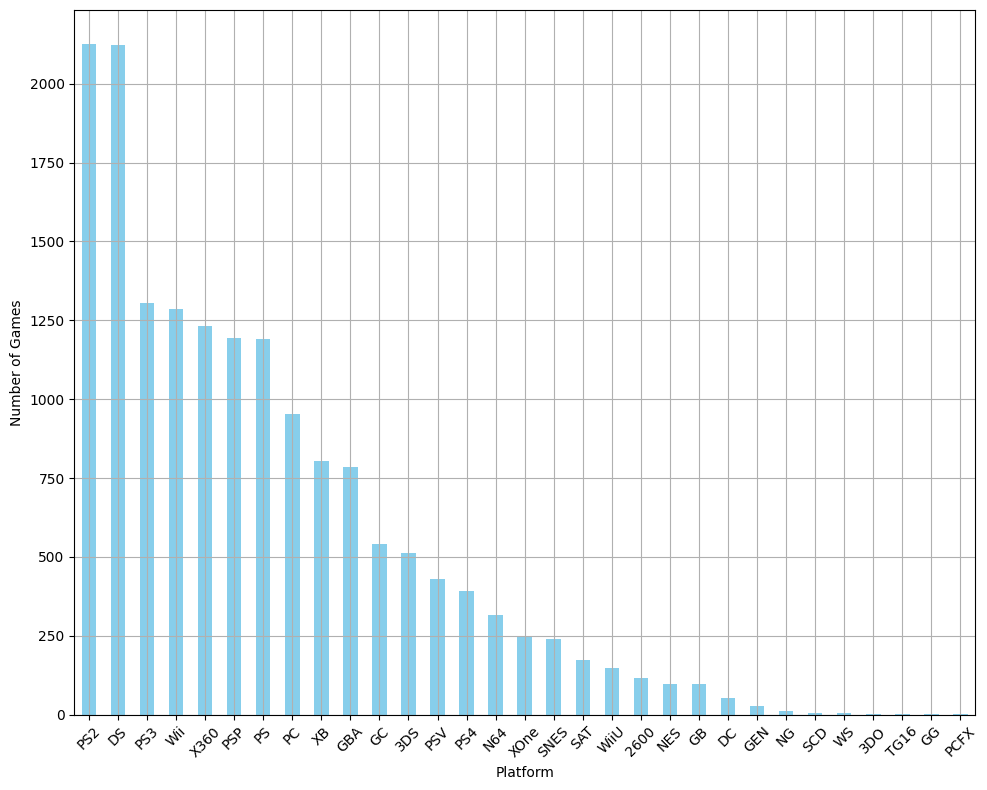

In [67]:
df['Platform'].value_counts().plot(kind='bar',color='skyblue',figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.grid(True)
plt.tight_layout()
plt.show()